In [13]:
pip install  pytesseract

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# plt.style.use('dark_bakcground')

In [15]:
img_ori = cv2.imread('car2.jpg', cv2.IMREAD_UNCHANGED)

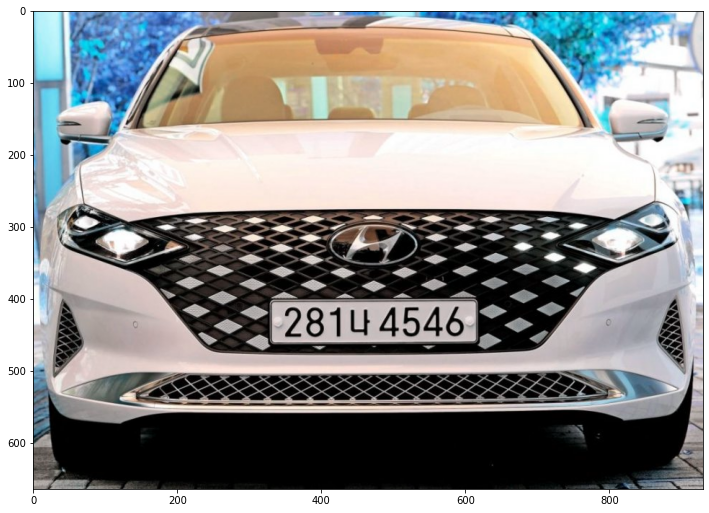

In [16]:
height, width, channel = img_ori.shape

plt.figure(figsize=(12, 10))

plt.imshow(img_ori, cmap='gray')

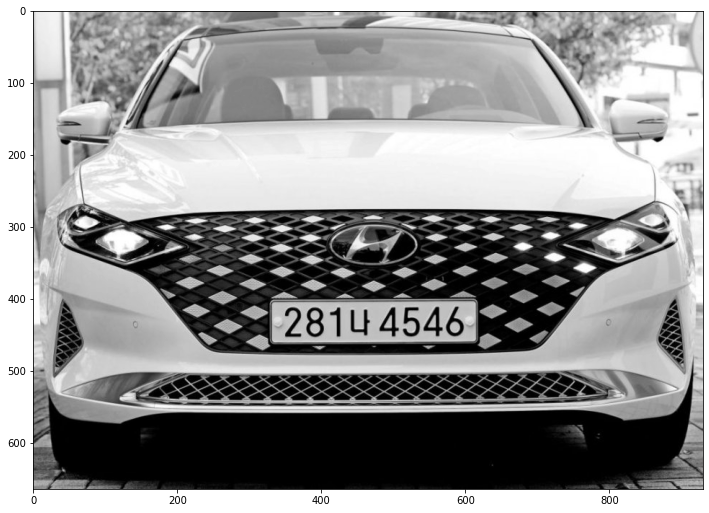

In [17]:
gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 10))

plt.imshow(gray, cmap='gray')

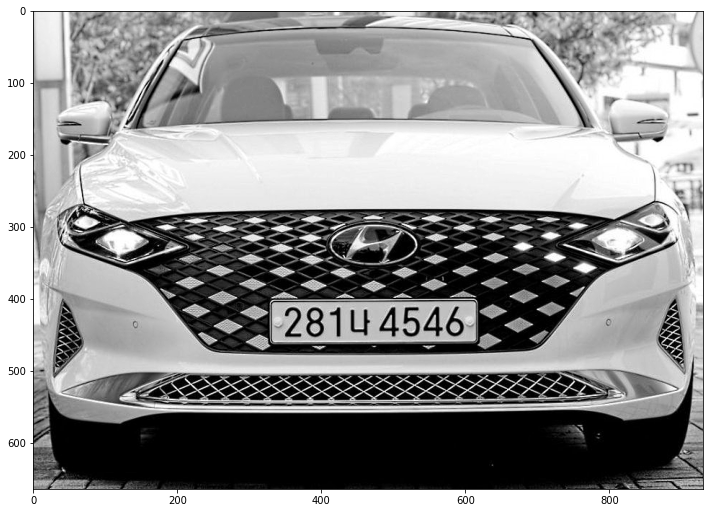

In [18]:
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))

imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')

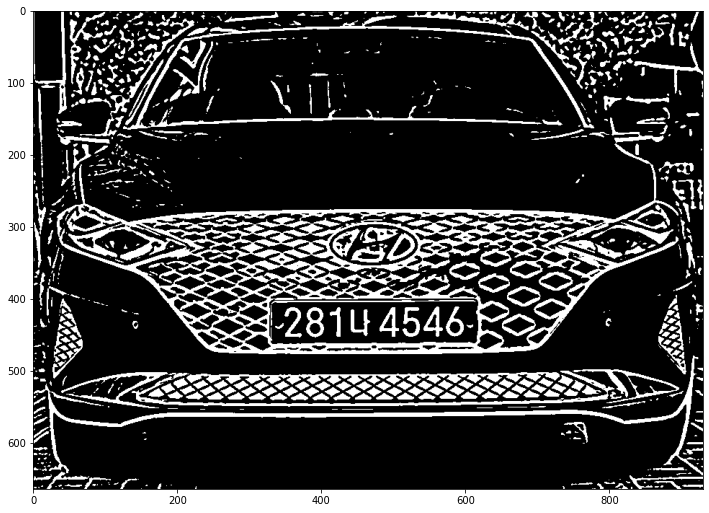

In [19]:
img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

plt.figure(figsize=(12, 10))
plt.imshow(img_thresh, cmap='gray')

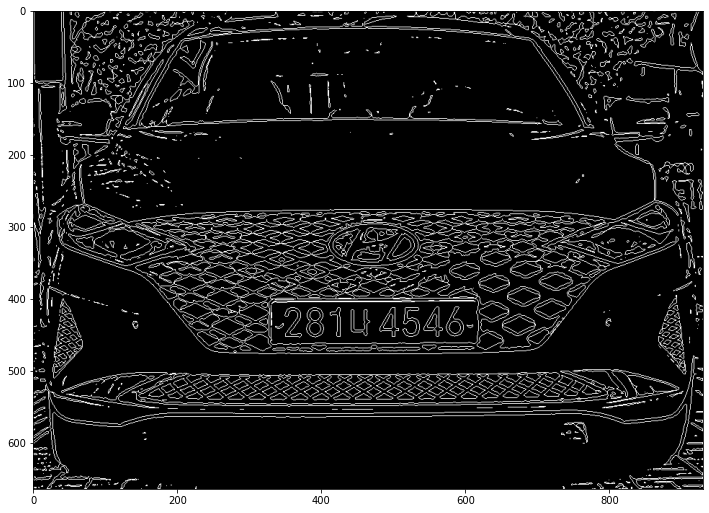

In [21]:
contours, _= cv2.findContours(  #윤곽선을 찾는다
    img_thresh, 
    mode=cv2.RETR_LIST, 
    method=cv2.CHAIN_APPROX_SIMPLE
)

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255)) #윤곽선을 그린다

plt.figure(figsize=(12, 10))
plt.imshow(temp_result)